In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import umap
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Fix randoom seed for reproducibility
np.random.seed(42)

# Load the BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


## Load Dataset

In [2]:
# Load the CSV file
file_path = "./data/binary_dataset_kyle.csv"
data = pd.read_csv(file_path)

# Select columns that start with "rule_"
rule_columns = [col for col in data.columns if col.startswith("rule_")]
print(rule_columns)
# Extract only those columns and replace NaNs with 0
data_rule_columns = data[rule_columns].fillna(0)

# Convert each row into an array of floats
rows_as_arrays = data_rule_columns.apply(lambda row: row.astype(float).tolist(), axis=1).tolist()
embeddings = np.array(rows_as_arrays)

['rule_1_1', 'rule_1_11', 'rule_1_13', 'rule_1_14', 'rule_1_15', 'rule_1_15A', 'rule_1_15B', 'rule_1_16', 'rule_1_2', 'rule_1_3', 'rule_1_4', 'rule_1_5', 'rule_1_6', 'rule_1_7', 'rule_1_8', 'rule_1_9', 'rule_2_1', 'rule_2_2', 'rule_2_3', 'rule_2_4', 'rule_3_1', 'rule_3_2', 'rule_3_3', 'rule_3_4', 'rule_3_5', 'rule_3_6', 'rule_3_7', 'rule_3_8', 'rule_3_9', 'rule_4_1', 'rule_4_2', 'rule_4_3', 'rule_4_4', 'rule_5_1', 'rule_5_2', 'rule_5_3', 'rule_5_4', 'rule_5_5', 'rule_5_6', 'rule_5_7', 'rule_5_8', 'rule_6_1', 'rule_6_2', 'rule_6_3', 'rule_6_4', 'rule_6_5', 'rule_7_1', 'rule_7_2', 'rule_7_3', 'rule_7_4', 'rule_7_5', 'rule_7_6', 'rule_8_1', 'rule_8_2', 'rule_8_4', 'rule_8_4a', 'rule_8_4b', 'rule_8_4c', 'rule_8_4d', 'rule_8_4i', 'rule_8_4j', 'rule_8_4k', 'rule_8_4l', 'rule_8_4n', 'rule_8_5']


## PCA

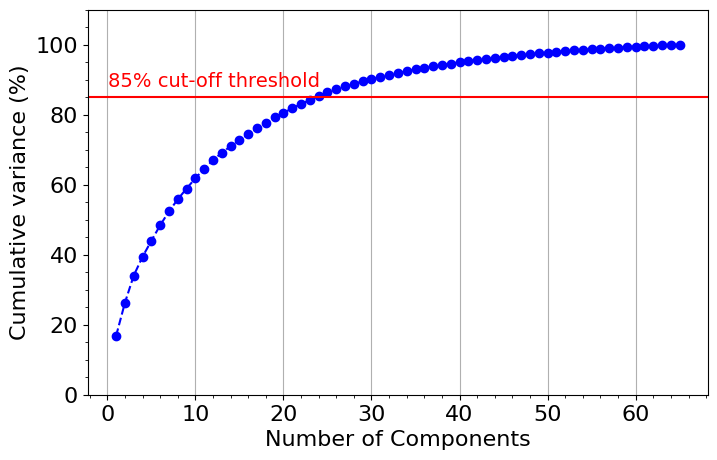

In [3]:
pca = PCA().fit(rows_as_arrays)
plt.rcParams["figure.figsize"] = (8,5)

fig, ax = plt.subplots()
xi = np.arange(1, 66, step=1)
y = np.cumsum(pca.explained_variance_ratio_*100)

plt.ylim(0.0,110)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components', fontsize=16)
plt.xticks(np.arange(0, 66, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)', fontsize=16)

plt.axhline(y=85, color='r', linestyle='-')
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.text(0.1, 88, '85% cut-off threshold', color = 'red', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.grid(axis='x')
plt.show()

## UMAP and TSNE

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


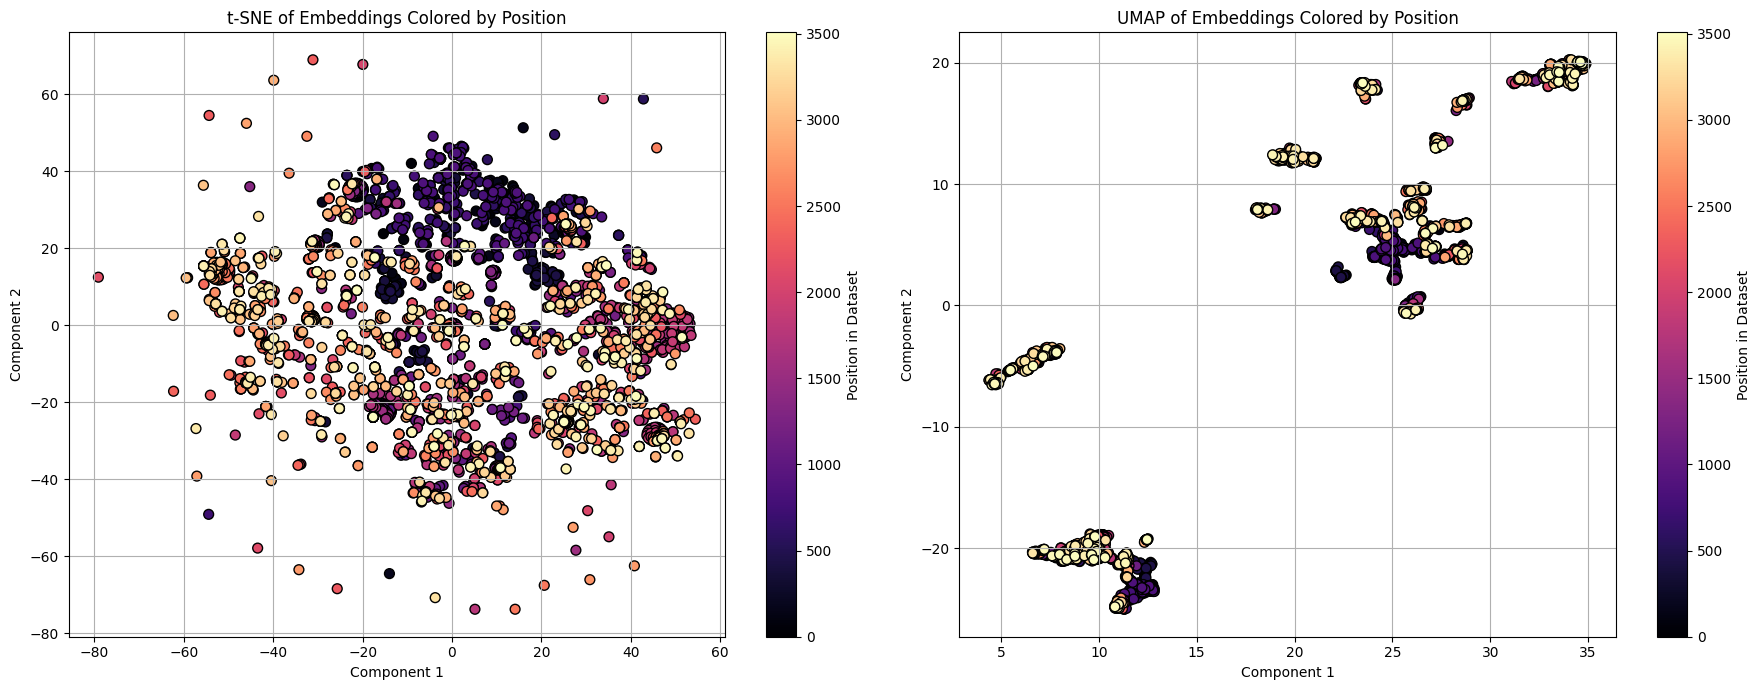

In [4]:
# Dimensionality Reduction and Clustering

# Perform t-SNE to reduce dimensionality to 2D
tsne_model = TSNE(n_components=2, random_state=42)
tsne_result = tsne_model.fit_transform(embeddings)

# Perform UMAP to reduce dimensionality to 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(embeddings)

# Perform KMeans clustering with 6 clusters on both t-SNE and UMAP results
kmeans_tsne = KMeans(n_clusters=6, random_state=42)
cluster_labels_tsne = kmeans_tsne.fit_predict(tsne_result)

kmeans_umap = KMeans(n_clusters=6, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_result)

# Generate color maps based on dataset positions
positions = np.arange(len(tsne_result))
colors_tsne = plt.cm.magma(positions / max(positions))
colors_umap = plt.cm.magma(positions / max(positions))

# Create a figure with two subplots for t-SNE and UMAP results
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot t-SNE results
scatter_tsne = axes[0].scatter(tsne_result[:, 0], tsne_result[:, 1], c=positions, cmap='magma', edgecolor='k', s=50)
axes[0].set_title('t-SNE of Embeddings Colored by Position')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].grid(True)
cbar_tsne = plt.colorbar(scatter_tsne, ax=axes[0], label='Position in Dataset')

# Plot UMAP results
scatter_umap = axes[1].scatter(umap_result[:, 0], umap_result[:, 1], c=positions, cmap='magma', edgecolor='k', s=50)
axes[1].set_title('UMAP of Embeddings Colored by Position')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].grid(True)
cbar_umap = plt.colorbar(scatter_umap, ax=axes[1], label='Position in Dataset')

plt.tight_layout()
plt.show()

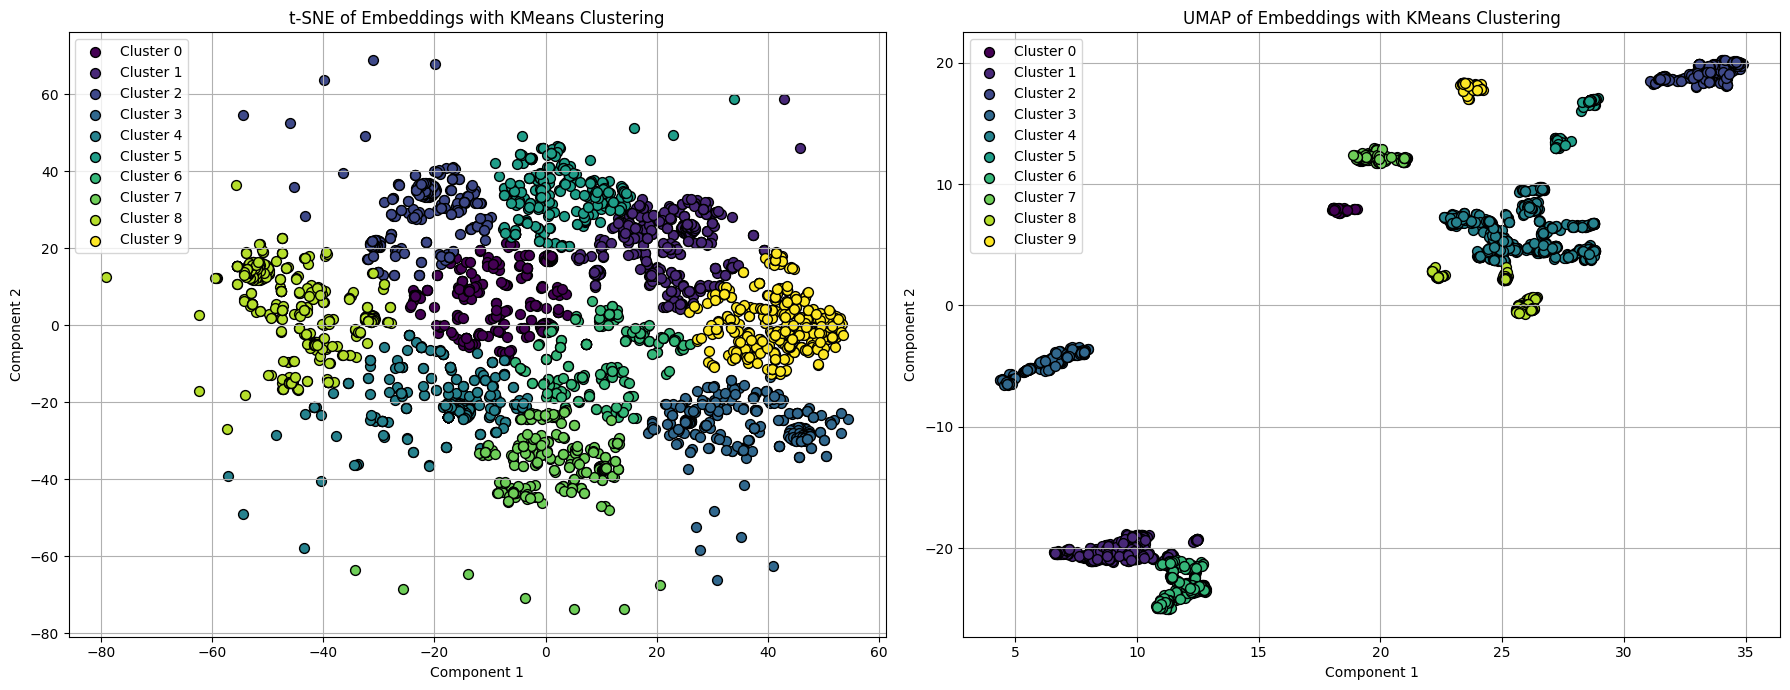

In [5]:
# Clustering and Visualization with 10 Clusters

# Perform KMeans clustering with 10 clusters on t-SNE results
kmeans_tsne_10 = KMeans(n_clusters=10, random_state=42)
cluster_labels_tsne_10 = kmeans_tsne_10.fit_predict(tsne_result)

# Generate a color map based on clustering labels for t-SNE
unique_labels_tsne_10 = np.unique(cluster_labels_tsne_10)
colors_tsne_10 = plt.cm.viridis(np.linspace(0, 1, len(unique_labels_tsne_10)))

# Perform KMeans clustering with 10 clusters on UMAP results
kmeans_umap_10 = KMeans(n_clusters=10, random_state=42)
cluster_labels_umap_10 = kmeans_umap_10.fit_predict(umap_result)

# Generate a color map based on clustering labels for UMAP
unique_labels_umap_10 = np.unique(cluster_labels_umap_10)
colors_umap_10 = plt.cm.viridis(np.linspace(0, 1, len(unique_labels_umap_10)))

# Create a figure with two subplots for t-SNE and UMAP results
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot t-SNE results with clustering labels
for label, color in zip(unique_labels_tsne_10, colors_tsne_10):
    idx = cluster_labels_tsne_10 == label
    axes[0].scatter(tsne_result[idx, 0], tsne_result[idx, 1], c=[color], label=f'Cluster {label}', edgecolor='k', s=50)
axes[0].set_title('t-SNE of Embeddings with KMeans Clustering')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].legend()
axes[0].grid(True)

# Plot UMAP results with clustering labels
for label, color in zip(unique_labels_umap_10, colors_umap_10):
    idx = cluster_labels_umap_10 == label
    axes[1].scatter(umap_result[idx, 0], umap_result[idx, 1], c=[color], label=f'Cluster {label}', edgecolor='k', s=50)
axes[1].set_title('UMAP of Embeddings with KMeans Clustering')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [6]:
# Initialize cluster centers with zeros
cluster_centers = np.zeros((len(unique_labels_umap_10), embeddings.shape[1]))

# Calculate the sum of embeddings for each cluster
for label in unique_labels_umap_10:
    cluster_centers[label] = embeddings[cluster_labels_umap == label].sum(axis=0)

# Print the average vectors for each cluster
print("Sum of Vectors for Each Cluster:")
for label, center in zip(unique_labels_umap_10, cluster_centers):
    print(f"Sum vector for Cluster {label}: {center}")


Sum of Vectors for Each Cluster:
Sum vector for Cluster 0: [ 66.   1.   0.   0.  13.   6.   1.  15. 274.  28.  35.  19.  11.  13.
  18.  40.   6.   6.   4.   2.  29.  21. 105.  43.  13.   6.   7.   8.
   5.  37.   9.   3.  15.   8.   5.  16.   9.  48.   5.   5.   5.   6.
   3.   1.   1.   4.  53.  36.  10.  10.  11.   7. 210.  10. 209.   0.
   5.   6.   5.   0.   1.   0.   0.   0.   5.]
Sum vector for Cluster 1: [516.   6.   1.   3. 204.   1.   0. 240. 175. 496. 473. 165.  12.  26.
  21.   6.   4.   5.   6.   2.  23. 106.  57.  68.  10.   3.   2.   3.
   1.  29.  12.   4.  20.  16.   3.  36.  12.  68.   3.   3.   3.   2.
   2.   4.   2.   2.  22.   4.   8.   9.   9.   3. 263.   4. 318.   2.
   2.  15.   8.   3.   2.   0.   1.   0.   0.]
Sum vector for Cluster 2: [ 35.   0.   2.   2.  23.   7.   0.  15.   9.  34.  23.  25.  10.  58.
  26.  16.   7.   5.   2.   2.  30.  22.   6.  55.  25.   4.   2.   2.
   0.  24.  23.   7.  22.   6.   4.  15.  13.  53.   0.   1.   1.   5.
   2.   1.   1